# Step 1: Add data and create transposed dataframe with roads and their LRPS

In [181]:
import pandas as pd
import numpy as np

In [182]:
## Open the roads.tsv file in a dataframe. Here we have information about all the LRPS documented per road.
df_rds = pd.read_csv('WBSIM_Lab1_2024/infrastructure/_roads.tsv', sep="\t", low_memory= False)

In [183]:
df_rds

,road,lrp1,lat1,lon1,lrp2,lat2,lon2,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 4035,Unnamed: 4036,Unnamed: 4037,Unnamed: 4038,Unnamed: 4039,Unnamed: 4040,Unnamed: 4041,Unnamed: 4042,Unnamed: 4043,Unnamed: 4044
0,N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,...,92.29825,LRP466c,20.864667,92.298194,LRP467,20.862972,92.298083,LRPE,20.862917,92.298083
1,N101,LRPS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N102,LRPS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N103,LRPS,23.957028,91.115528,LRP001,23.961917,91.113611,LRP001a,23.967666,91.111889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N104,LRPS,23.009667,91.399416,LRPSa,23.009278,91.395250,LRP001,23.009306,91.389805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Z8910,LRPS,22.674722,90.408889,LRPSa,22.675916,90.412556,LRP001,22.675583,90.417166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,Z8913,LRPS,22.396083,90.688666,LRPSa,22.393027,90.688944,LRPSb,22.392666,90.689083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,Z8915,LRPS,22.589389,90.619472,LRP001,22.589694,90.623360,LRP001a,22.590027,90.631360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,Z8916,LRPS,22.625499,90.661722,LRPSa,22.623888,90.664167,LRP001,22.620305,90.668999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
## In order to make the information more usable, we transpose the dataframe. In order to do so efficiently, we made a function:
def transpose_data(df):
    new_data = []

    for _, row in df.iterrows(): # Iterate through all rows
        road = row['road']  # Get the value in the 'road' column for the current row
        values = [] # Prepare empty list to gather LRP, lat and lon values
        for col, value in row.items(): # Iterate through all columns
            if pd.isna(value): # Stop when reaching nan value
                break
            if col != 'road':  # Skip the 'road' column
                values.append(value)
            if len(values) == 3:
                new_data.append([road, values[0], values[1], values[2]])
                values = [] # Reset the list for next 3 values

    return(pd.DataFrame(new_data, columns=['road', 'LRP', 'lat', 'lon']))

In [185]:
df_rds_transposed = transpose_data(df_rds)

In [186]:
df_rds_transposed.head()

,road,LRP,lat,lon
0,N1,LRPS,23.706028,90.443333
1,N1,LRPSa,23.702917,90.450417
2,N1,LRPSb,23.702778,90.450472
3,N1,LRP001,23.702139,90.451972
4,N1,LRP002,23.697889,90.460583


In [187]:
# Filter roads if needed
df_rds_filtered = pd.DataFrame()
df_rds_filtered = df_rds_transposed[df_rds_transposed['road'].str.startswith(('N','R','Z'), na=False)]

In [188]:
df_rds_filtered

,road,LRP,lat,lon
0,N1,LRPS,23.706028,90.443333
1,N1,LRPSa,23.702917,90.450417
2,N1,LRPSb,23.702778,90.450472
3,N1,LRP001,23.702139,90.451972
4,N1,LRP002,23.697889,90.460583
...,...,...,...,...
52205,Z8943,LRP007,22.429499,90.785722
52206,Z8943,LRP008,22.430110,90.776333
52207,Z8943,LRP008a,22.430249,90.774888
52208,Z8943,LRP008b,22.430249,90.774860


# Step 2: Determine the initial distance between LRP's

In [189]:
def initial_distances():
    df_rds_distances = df_rds_filtered.copy()
    
    # Shifted df's to compare lats and lons
    df_shift_next = df_rds_distances.shift(-1) 
    df_shift_prev = df_rds_distances.shift(1)

    for index, row in df_rds_distances.iterrows():
        if row['LRP'] == 'LRPS': # Starting LRPs don't have a len_prev
            df_rds_distances.at[index, 'type'] = "Start point"
            df_rds_distances.at[index, 'len_prev'] = 0
            df_rds_distances.at[index, 'len_next'] = np.sqrt((df_shift_next.at[index, 'lat'] - row['lat'])**2 + (df_shift_next.at[index, 'lon'] - row['lon'])**2)
            
        elif row['LRP'] == 'LRPE': # Ending LRPs don't have a len_next
            df_rds_distances.at[index, 'type'] = "End point"
            df_rds_distances.at[index, 'len_prev'] = np.sqrt((df_rds_distances.at[index, 'lat'] - df_shift_prev.at[index, 'lat'])**2 + (df_rds_distances.at[index, 'lon'] - df_shift_prev.at[index, 'lon'])**2)
            df_rds_distances.at[index, 'len_next'] = 0
            
        else:
             df_rds_distances.at[index, 'len_prev'] = np.sqrt((df_rds_distances.at[index, 'lat'] - df_shift_prev.at[index, 'lat'])**2 + (df_rds_distances.at[index, 'lon'] - df_shift_prev.at[index, 'lon'])**2)
             df_rds_distances.at[index, 'len_next'] = np.sqrt((df_shift_next.at[index, 'lat'] - row['lat'])**2 + (df_shift_next.at[index, 'lon'] - row['lon'])**2)
           
    
    return df_rds_distances

In [190]:
df_rds_distances = initial_distances()
df_rds_distances

,road,LRP,lat,lon,type,len_prev,len_next
0,N1,LRPS,23.706028,90.443333,Start point,0.000000,0.007737
1,N1,LRPSa,23.702917,90.450417,NaN,0.007737,0.000150
2,N1,LRPSb,23.702778,90.450472,NaN,0.000150,0.001630
3,N1,LRP001,23.702139,90.451972,NaN,0.001630,0.009603
4,N1,LRP002,23.697889,90.460583,NaN,0.009603,0.001205
...,...,...,...,...,...,...,...
52205,Z8943,LRP007,22.429499,90.785722,NaN,0.002514,0.009409
52206,Z8943,LRP008,22.430110,90.776333,NaN,0.009409,0.001451
52207,Z8943,LRP008a,22.430249,90.774888,NaN,0.001451,0.000028
52208,Z8943,LRP008b,22.430249,90.774860,NaN,0.000028,0.005945


In [191]:
df_rds_distances.len_next.describe()

count    52210.000000
mean         0.016738
std          0.209638
min          0.000000
25%          0.001002
50%          0.002888
75%          0.005898
max         20.001111
Name: len_next, dtype: float64

In [192]:
def correct_single_outliers(quantile):
    df_singlecorrected = df_rds_distances.copy()
    
    # Used to check the previous and next value of an outlier
    df_shift_next = df_singlecorrected.shift(-1)
    df_shift_prev = df_singlecorrected.shift(1)
    
    # Determine the threshold by which to filter outliers
    threshold_next = df_singlecorrected.groupby('road')['len_next'].quantile(quantile)*20
    threshold_prev = df_singlecorrected.groupby('road')['len_prev'].quantile(quantile)*20

    for index, row in df_singlecorrected.iterrows(): # Iterate each LRP
        road = row['road']       
        # If the length to the next and previous LRP > threshold, change position to the mean of the next and previous LRP 
        if (row['len_next'] > threshold_next[road]) and (row['len_prev'] > threshold_prev[road]):
            # Note how much we adjust the lat and lon
            df_singlecorrected.loc[index,'lat_correction'] = (df_singlecorrected.loc[index, 'lat']) - ((df_shift_next.at[index, 'lat'] + df_shift_prev.at[index, 'lat'])/2)
            df_singlecorrected.loc[index,'lon_correction'] = (df_singlecorrected.loc[index, 'lon']) - ((df_shift_next.at[index, 'lon'] + df_shift_prev.at[index, 'lon'])/2)

            # Identify the outlier as a single outlier
            df_singlecorrected.loc[index,'corrected'] = 'single outlier'

            # Adjust lat and lon
            df_singlecorrected.loc[index, 'lat'] = (df_shift_next.at[index, 'lat'] + df_shift_prev.at[index, 'lat'])/2
            df_singlecorrected.loc[index, 'lon'] = (df_shift_next.at[index, 'lon'] + df_shift_prev.at[index, 'lon'])/2
    
                                   
    # Correct values for length to LRPs after correction
    df_shift_next_new = df_singlecorrected.shift(-1)
    df_shift_prev_new = df_singlecorrected.shift(1)

    
    df_singlecorrected['len_prev'] = np.sqrt((df_shift_prev_new.lat - df_singlecorrected.lat)**2 + (df_shift_prev_new.lon - df_singlecorrected.lon)**2)
    df_singlecorrected['len_next'] = np.sqrt((df_shift_next_new.lat - df_singlecorrected.lat)**2 + (df_shift_next_new.lon - df_singlecorrected.lon)**2)
    
    return df_singlecorrected

In [193]:
df_rds_singlecorrected = correct_single_outliers(0.8)
df_rds_singlecorrected

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
0,N1,LRPS,23.706028,90.443333,Start point,NaN,0.007737,NaN,NaN,NaN
1,N1,LRPSa,23.702917,90.450417,NaN,0.007737,0.000150,NaN,NaN,NaN
2,N1,LRPSb,23.702778,90.450472,NaN,0.000150,0.001630,NaN,NaN,NaN
3,N1,LRP001,23.702139,90.451972,NaN,0.001630,0.009603,NaN,NaN,NaN
4,N1,LRP002,23.697889,90.460583,NaN,0.009603,0.001205,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
52205,Z8943,LRP007,22.429499,90.785722,NaN,0.002514,0.009409,NaN,NaN,NaN
52206,Z8943,LRP008,22.430110,90.776333,NaN,0.009409,0.001451,NaN,NaN,NaN
52207,Z8943,LRP008a,22.430249,90.774888,NaN,0.001451,0.000028,NaN,NaN,NaN
52208,Z8943,LRP008b,22.430249,90.774860,NaN,0.000028,0.005945,NaN,NaN,NaN


In [194]:
df_rds_singlecorrected.corrected.value_counts()

corrected
single outlier    223
Name: count, dtype: int64

# Step 3: Identify Sequential outliers

In [195]:
def identify_sequential_outliers(quantile):

    df_rds = df_rds_singlecorrected
    df_seq_outliers = pd.DataFrame()    

    # Determine the threshold length
    threshold_next = df_rds.groupby('road')['len_next'].quantile(quantile)*20
    threshold_prev = df_rds.groupby('road')['len_prev'].quantile(quantile)*20
   
    for index, row in df_rds.iterrows(): # Iterate each LRP
        road = row['road']
        new_row = []
        columns = df_rds.columns
        columns = columns.insert(0, 'index') # Manually insert the index column
        # For when the LRP is not a start or end
        if row['LRP'] != 'LRPE' and row['LRP'] != 'LRPS':
            # Some sequential outliers are single outliers as well (a single outlier in a sequence of outliers)
            if df_rds.at[index,'corrected']=='single outlier':
                df_rds.at[index,'corrected']='Single outlier in sequence'
            # The idea is to create a list containing all the adjusted values of the row and adding that to a dataframe        
            if (row['len_prev'] > threshold_prev[road]):  
                new_row.append(index) 
                for c in columns[1:]:
                    new_row.append(df_rds.loc[index, c])
                if df_rds.at[index,'corrected'] != 'Single outlier in sequence':
                    new_row[-1] = 'Sequential flag'
                new_row_df = pd.DataFrame([new_row], columns=columns)
                df_seq_outliers = pd.concat([df_seq_outliers, new_row_df], ignore_index=True)
            
        elif row['LRP'] == 'LRPE':
            if (row['len_prev'] > threshold_prev[road]):        
                new_row.append(index)
                for c in columns[1:]:
                    new_row.append(df_rds.loc[index, c])
                new_row[-1] = 'LRPE sequential flag'
                new_row_df = pd.DataFrame([new_row], columns=columns)
                df_seq_outliers = pd.concat([df_seq_outliers, new_row_df], ignore_index=True)
        
        elif row['LRP'] == 'LRPS':
            if (row['len_next'] > threshold_next[road]):
                new_row.append(index)
                for c in columns[1:]:
                    new_row.append(df_rds.loc[index, c])
                new_row[-1] = 'LRPS sequential flag'
                new_row_df = pd.DataFrame([new_row], columns=columns)
                df_seq_outliers = pd.concat([df_seq_outliers, new_row_df], ignore_index=True)



    return df_seq_outliers
        

In [196]:
df_seq_outliers = identify_sequential_outliers(0.8)
df_seq_outliers.corrected.value_counts()

corrected
Sequential flag               56
Single outlier in sequence    13
LRPE sequential flag           9
LRPS sequential flag           5
Name: count, dtype: int64

In [197]:
df_seq_outliers

,index,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
0,792,N1,LRP323a,22.874916,92.059111,NaN,0.995500,0.004417,NaN,NaN,Sequential flag
1,794,N1,LRP324a,21.862500,92.059500,NaN,1.007999,0.000868,NaN,NaN,Sequential flag
2,2272,N111,LRPE,21.298472,91.792222,End point,1.000750,1.762203,NaN,NaN,LRPE sequential flag
3,4710,N405,LRP036c,24.422805,89.596361,NaN,0.349792,0.003945,NaN,NaN,Sequential flag
4,4994,N5,LRP098a,23.898694,89.660056,NaN,0.185762,0.000000,NaN,NaN,Sequential flag
...,...,...,...,...,...,...,...,...,...,...,...
78,47509,Z7717,LRPE,22.481722,89.612500,End point,0.166696,0.256378,NaN,NaN,LRPE sequential flag
79,50226,Z8603,LRP013f,23.069805,92.166722,NaN,1.999695,0.000000,NaN,NaN,Sequential flag
80,50228,Z8603,LRP013g,23.068610,90.165500,NaN,2.001222,0.002734,NaN,NaN,Sequential flag
81,50261,Z8604,LRPS,23.169499,89.218388,Start point,0.958115,1.006079,NaN,NaN,LRPS sequential flag


In [198]:
# Create new df to help with the upcoming merge
df_seq_outliers_merge = df_seq_outliers.copy()
df_seq_outliers_merge.set_index('index', inplace=True)

In [199]:
df_seq_outliers_merge

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
index,,,,,,,,,,
792,N1,LRP323a,22.874916,92.059111,NaN,0.995500,0.004417,NaN,NaN,Sequential flag
794,N1,LRP324a,21.862500,92.059500,NaN,1.007999,0.000868,NaN,NaN,Sequential flag
2272,N111,LRPE,21.298472,91.792222,End point,1.000750,1.762203,NaN,NaN,LRPE sequential flag
4710,N405,LRP036c,24.422805,89.596361,NaN,0.349792,0.003945,NaN,NaN,Sequential flag
4994,N5,LRP098a,23.898694,89.660056,NaN,0.185762,0.000000,NaN,NaN,Sequential flag
...,...,...,...,...,...,...,...,...,...,...
47509,Z7717,LRPE,22.481722,89.612500,End point,0.166696,0.256378,NaN,NaN,LRPE sequential flag
50226,Z8603,LRP013f,23.069805,92.166722,NaN,1.999695,0.000000,NaN,NaN,Sequential flag
50228,Z8603,LRP013g,23.068610,90.165500,NaN,2.001222,0.002734,NaN,NaN,Sequential flag


In [200]:
for index_value in df_seq_outliers_merge.index:
    # Replace the row in df_rds_singlecorrected with the row from sequential_outliers so outliers can be identified
    df_rds_singlecorrected.loc[index_value] = df_seq_outliers_merge.loc[index_value]

In [201]:
# There are about 25 roads where there are two sequential outliers; these can be corrected by algorithm
df_seq_outliers['road'].value_counts().head(30)

road
Z7717    4
Z5210    3
N6       3
Z1421    3
Z7606    2
Z8603    2
Z7489    2
Z7460    2
Z7404    2
Z7045    2
Z1416    2
Z5066    2
Z5039    2
Z5019    2
Z4614    2
Z3711    2
Z3603    2
Z2808    2
Z2036    2
N1       2
Z8604    2
Z1013    2
R745     2
Z1081    2
N507     2
Z1047    2
R140     2
Z1037    2
R281     2
R371     2
Name: count, dtype: int64

In [202]:
# Count the occurrences of each road
road_counts = df_seq_outliers['road'].value_counts()

# Get the roads with 2 occurrences
target_roads = road_counts[road_counts == 2].index.tolist()

# Roads to correct manually
manual_correct_roads = road_counts[road_counts != 2].index.tolist()

# Creating the boolean mask
mask = df_seq_outliers['road'].isin(target_roads)
manual_correct_mask = df_seq_outliers['road'].isin(manual_correct_roads)

# Filtering DataFrame based on the mask
df_seq_double_outliers = df_seq_outliers[mask]
df_other_outliers = df_seq_outliers[manual_correct_mask]

In [203]:
df_seq_double_outliers # All rows where there are 2 outliers in a road

,index,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
0,792,N1,LRP323a,22.874916,92.059111,NaN,0.995500,0.004417,NaN,NaN,Sequential flag
1,794,N1,LRP324a,21.862500,92.059500,NaN,1.007999,0.000868,NaN,NaN,Sequential flag
5,6311,N507,LRP002,25.416472,89.542055,NaN,0.997648,0.000317,NaN,NaN,Sequential flag
6,6314,N507,LRP002c,24.413611,89.532527,NaN,1.001061,0.000212,NaN,NaN,Sequential flag
10,10242,R140,LRP079,23.309917,90.728999,NaN,0.164918,0.167584,NaN,NaN,Sequential flag
11,10243,R140,LRP079a,23.142333,90.729305,NaN,0.167584,0.008099,NaN,NaN,Sequential flag
13,13219,R281,LRP018,24.512417,91.005806,NaN,0.993777,0.000479,NaN,NaN,Sequential flag
14,13221,R281,LRP019,24.513111,92.015694,NaN,1.009417,0.001666,NaN,NaN,Sequential flag
16,14793,R371,LRP036,24.622749,90.259861,NaN,0.332505,0.000000,NaN,NaN,Sequential flag
17,14795,R371,LRP036a,24.956750,90.258750,NaN,0.334003,0.001711,NaN,NaN,Sequential flag


In [204]:
df_other_outliers # Alle rijen waar outliers 1, 3 of 4x voorkomen in een weg en dus manually gecorrect moeten worden

,index,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
2,2272,N111,LRPE,21.298472,91.792222,End point,1.000750,1.762203,NaN,NaN,LRPE sequential flag
3,4710,N405,LRP036c,24.422805,89.596361,NaN,0.349792,0.003945,NaN,NaN,Sequential flag
4,4994,N5,LRP098a,23.898694,89.660056,NaN,0.185762,0.000000,NaN,NaN,Sequential flag
7,7151,N6,LRP109,24.393083,89.931555,NaN,0.991567,0.009730,NaN,NaN,Sequential flag
8,7156,N6,LRP112a,24.373499,88.904556,NaN,1.001392,0.005097,NaN,NaN,Sequential flag
9,7367,N6,LRPE,24.373138,88.563694,End point,0.630576,0.445908,NaN,NaN,LRPE sequential flag
12,12116,R203,LRP075a,23.902306,90.121888,NaN,0.994397,0.000056,NaN,NaN,Sequential flag
15,14653,R370,LRP112a,25.003889,91.238444,NaN,0.158989,0.002398,NaN,NaN,Sequential flag
20,20114,Z1005,LRP039c,21.753972,92.211417,NaN,0.144201,0.000492,NaN,NaN,Sequential flag
23,20711,Z1025,LRP001b,22.499583,91.533972,NaN,0.164881,0.004866,NaN,NaN,Sequential flag


# Step 4: Correct sequential outliers

In [205]:
def correct_double_sequential_outliers():

    df_rds = df_rds_singlecorrected.copy() # The main df
    df_double_outliers = df_seq_double_outliers # The df with the outliers we want to correct
    df_manual_correct_outliers = df_other_outliers # The df with the outliers we correct manually
    index_list = df_double_outliers['index'].tolist()
    manual_correct_index = df_manual_correct_outliers['index'].tolist()

    rows_to_correct = df_rds[df_rds.index.isin(index_list)]
    rows_to_manualcorrect = df_rds[df_rds.index.isin(manual_correct_index)]

    count = 0

    for index, row in rows_to_correct.iterrows(): # Iterate each row to correct
        if row['road'].startswith('Z'): # Not correcting Z-roads
            df_rds.at[index, 'corrected'] = 'Not corrected Z-point'
        else:
            if count == 0: # Signifies the start of the chain
                previous_index = index-1 # This is the correct lat and lon, since the index is the first incorrect LRP
                first_correct_lat = df_rds.iloc[previous_index]['lat']
                first_correct_lon = df_rds.iloc[previous_index]['lon']
                count = 1
            elif count == 1:
                i = index # This is the end of the chain, so the first correct LRP after a sequence of outliers
                second_correct_lat = df_rds.iloc[index]['lat']
                second_correct_lon = df_rds.iloc[index]['lon']
    
                length_of_outliers = index-(previous_index+1)
                
                # Calculate the mean change per LRP between the first and second correct LRP
                lat_change = abs(first_correct_lat-second_correct_lat)/length_of_outliers 
                lon_change = abs(first_correct_lon-second_correct_lon)/length_of_outliers

                # Adjust coordinates accordingly
                for _ in range(length_of_outliers):
                    df_rds.at[i-1, 'lat_correction'] = (df_rds.at[i-1, 'lat']) - (df_rds.iloc[i+1].lat + lat_change)
                    df_rds.at[i-1, 'lon_correction'] = (df_rds.at[i-1, 'lon']) - (df_rds.iloc[i+1].lon + lon_change)

                    df_rds.at[i-1, 'lat'] = df_rds.iloc[i+1].lat + lat_change
                    df_rds.at[i-1, 'lon'] = df_rds.iloc[i+1].lon + lon_change
                    i -= 1
                    
                count = 0
                

    for index, row in rows_to_manualcorrect.iterrows(): # Iterate each LRP
        if row['road'].startswith('Z'): # We won't correct Z-roads manually
                continue
        else:
            df_rds.at[index, 'corrected'] = 'To correct manually'

    # Recompute lengths
    df_shift_next = df_rds.shift(-1)
    df_shift_prev = df_rds.shift(1)
    
    df_rds['len_next'] = np.sqrt((df_shift_next.lat - df_rds.lat)**2 + (df_shift_next.lon - df_rds.lon)**2)
    df_rds['len_prev'] = np.sqrt((df_shift_prev.lat - df_rds.lat)**2 + (df_shift_prev.lon - df_rds.lon)**2)
    return df_rds

In [206]:
df_rds_dblseqcorrected = correct_double_sequential_outliers()

In [207]:
df_rds_dblseqcorrected 

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
0,N1,LRPS,23.706028,90.443333,Start point,NaN,0.007737,NaN,NaN,NaN
1,N1,LRPSa,23.702917,90.450417,NaN,0.007737,0.000150,NaN,NaN,NaN
2,N1,LRPSb,23.702778,90.450472,NaN,0.000150,0.001630,NaN,NaN,NaN
3,N1,LRP001,23.702139,90.451972,NaN,0.001630,0.009603,NaN,NaN,NaN
4,N1,LRP002,23.697889,90.460583,NaN,0.009603,0.001205,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
52205,Z8943,LRP007,22.429499,90.785722,NaN,0.002514,0.009409,NaN,NaN,NaN
52206,Z8943,LRP008,22.430110,90.776333,NaN,0.009409,0.001451,NaN,NaN,NaN
52207,Z8943,LRP008a,22.430249,90.774888,NaN,0.001451,0.000028,NaN,NaN,NaN
52208,Z8943,LRP008b,22.430249,90.774860,NaN,0.000028,0.005945,NaN,NaN,NaN


# Manual correction part

In [208]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected["corrected"]=='To correct manually']

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
2272,N111,LRPE,21.298472,91.792222,End point,1.000750,1.762203,NaN,NaN,To correct manually
4710,N405,LRP036c,24.422805,89.596361,NaN,0.349792,0.003945,NaN,NaN,To correct manually
4994,N5,LRP098a,23.898694,89.660056,NaN,0.185762,0.000000,NaN,NaN,To correct manually
7151,N6,LRP109,24.393083,89.931555,NaN,0.991567,0.009730,NaN,NaN,To correct manually
7156,N6,LRP112a,24.373499,88.904556,NaN,1.001392,0.005097,NaN,NaN,To correct manually
7367,N6,LRPE,24.373138,88.563694,End point,0.630576,0.445908,NaN,NaN,To correct manually
12116,R203,LRP075a,23.902306,90.121888,NaN,0.994397,0.000056,NaN,NaN,To correct manually
14653,R370,LRP112a,25.003889,91.238444,NaN,0.158989,0.002398,NaN,NaN,To correct manually


### First outlier

In [209]:
df_rds_dblseqcorrected.iloc[2270:2275]

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
2270,N111,LRP012,22.313278,91.791666,NaN,0.006600,0.014082,NaN,NaN,NaN
2271,N111,LRP012a,22.299222,91.792527,NaN,0.014082,1.000750,NaN,NaN,NaN
2272,N111,LRPE,21.298472,91.792222,End point,1.000750,1.762203,NaN,NaN,To correct manually
2273,N112,LRPS,23.009194,91.369388,Start point,1.762203,0.000139,NaN,NaN,NaN
2274,N112,LRPSa,23.009306,91.369472,NaN,0.000139,0.003269,NaN,NaN,NaN


In [210]:
#We can see that the LRP is apparently 1 lat unit shifted by accident. That is how we will correct it
df_rds_dblseqcorrected.at[2272,'lat_correction'] = df_rds_dblseqcorrected.at[2272,'lat'] - 22.298472
df_rds_dblseqcorrected.at[2272,'lat']=22.298472

### Second outlier

In [211]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'N405']

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
4710,N405,LRP036c,24.422805,89.596361,NaN,0.349792,0.003945,NaN,NaN,To correct manually
4711,N405,LRP036d,24.423277,89.592444,NaN,0.003945,0.002153,NaN,NaN,NaN
4712,N405,LRP036e,24.423527,89.590305,NaN,0.002153,0.000473,NaN,NaN,NaN
4713,N405,LRP037,24.423555,89.589833,NaN,0.000473,0.009766,NaN,NaN,NaN
4714,N405,LRP038,24.424110,89.580083,NaN,0.009766,0.009866,NaN,NaN,NaN
4715,N405,LRP039,24.422277,89.570388,NaN,0.009866,0.009663,NaN,NaN,NaN
4716,N405,LRP040,24.420360,89.560917,NaN,0.009663,0.004380,NaN,NaN,NaN
4717,N405,LRP040a,24.419722,89.556583,NaN,0.004380,0.000586,NaN,NaN,NaN
4718,N405,LRP040b,24.419666,89.556000,NaN,0.000586,0.004235,NaN,NaN,NaN
4719,N405,LRPE,24.419083,89.551806,End point,0.004235,0.798415,NaN,NaN,NaN


<Axes: xlabel='lon'>

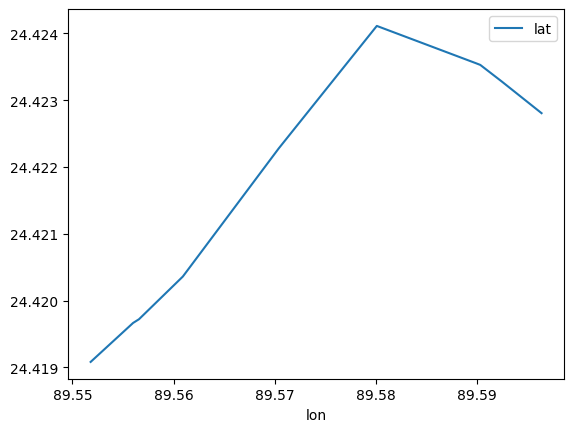

In [212]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'N405'].plot(x='lon', y='lat')

In this case, the LRP is a Start point and it seems to be in the correct place. However, we can see that the len_previous is high and that is probably the reason why it has been flagged. This happened because we filtered start points assuming they are all called "LRPS". We will correct this point by changing the len_prev to 0.

In [213]:
df_rds_dblseqcorrected.at[4710,'type']= 'Start point'
df_rds_dblseqcorrected.at[4710,'len_next']=0

### Third outlier

In [214]:
df_rds_dblseqcorrected.iloc[4990:5000]

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
4990,N5,LRP077b,23.795389,89.810472,NaN,0.002252,0.003789,NaN,NaN,NaN
4991,N5,LRP077c,23.791750,89.811528,NaN,0.003789,0.000736,NaN,NaN,NaN
4992,N5,LRP078,23.791027,89.811667,NaN,0.000736,0.002266,NaN,NaN,NaN
4993,N5,LRP078a,23.789305,89.810194,NaN,0.002266,0.185762,NaN,NaN,NaN
4994,N5,LRP098a,23.898694,89.660056,NaN,0.185762,0.000000,NaN,NaN,To correct manually
4995,N5,LRP098b,23.898694,89.660056,NaN,0.000000,0.000439,NaN,NaN,NaN
4996,N5,LRP099,23.898333,89.659806,NaN,0.000439,0.008579,NaN,NaN,NaN
4997,N5,LRP099a,23.892833,89.653222,NaN,0.008579,0.000115,NaN,NaN,NaN
4998,N5,LRP099b,23.892722,89.653194,NaN,0.000115,0.000262,NaN,NaN,NaN
4999,N5,LRP099c,23.892500,89.653056,NaN,0.000262,0.000062,NaN,NaN,NaN


This LRP has a seemingly big difference with the previous one, namely around 1.5 km. By checking the name of the previous LRP we can see that it changed 20 LRPs: from LRP:078a to LRP: 098a. This could indicate that a number of LRPS (placed in the 1.5 km inbetween) are removed by the government or a disaster. By plotting the road, we can not identify a big difference and it seems logical to leave the coordinates as they are. 

<Axes: xlabel='lon'>

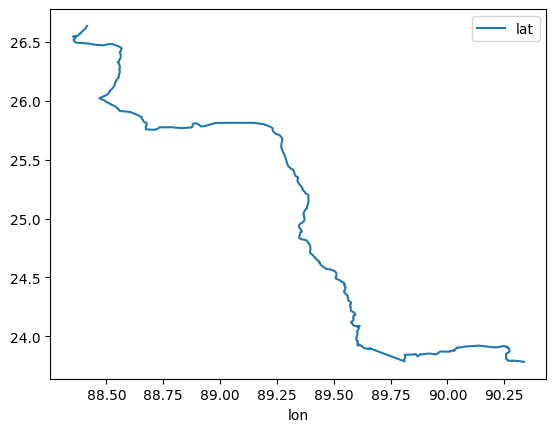

In [215]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'N5'].plot(x='lon', y='lat')

### Fourth outlier

In [216]:
df_rds_dblseqcorrected.iloc[7150:7160]

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
7150,N6,LRP108a,24.397916,88.940000,NaN,0.000062,0.991567,NaN,NaN,NaN
7151,N6,LRP109,24.393083,89.931555,NaN,0.991567,0.009730,NaN,NaN,To correct manually
7152,N6,LRP110,24.388250,89.923110,NaN,0.009730,0.009640,NaN,NaN,NaN
7153,N6,LRP111,24.383805,89.914556,NaN,0.009640,0.002956,NaN,NaN,NaN
7154,N6,LRP111a,24.381888,89.912306,NaN,0.002956,0.008687,NaN,NaN,NaN
7155,N6,LRP112,24.375972,89.905944,NaN,0.008687,1.001392,NaN,NaN,NaN
7156,N6,LRP112a,24.373499,88.904556,NaN,1.001392,0.005097,NaN,NaN,To correct manually
7157,N6,LRP113,24.372666,88.899527,NaN,0.005097,0.005017,NaN,NaN,NaN
7158,N6,LRP113a,24.372249,88.894527,NaN,0.005017,0.000000,NaN,NaN,NaN
7159,N6,LRP113a,24.372249,88.894527,NaN,0.000000,0.005142,NaN,NaN,NaN


<Axes: xlabel='lon'>

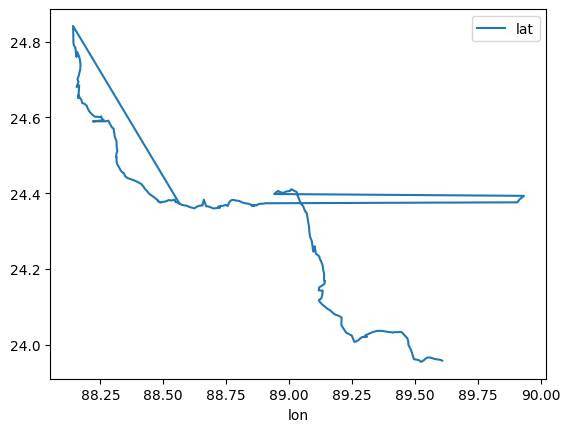

In [217]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'N6'].plot(x='lon', y='lat')

As far as the first two LRPs flagged on the N6 road, it seems like a typical sequential outliers condition. So the question here would be: why weren't they treated by the previous code? The answer to that is that that code is made solely for when pairs (so 2 points) were flagged on a road. In this case, as we will discuss in the next point N6: LRPE has also been flagged. To be sure on how to make pairs, when multiple flags occurred we decided to inspect them manually. These points will be treated manually:

In [218]:
df_rds_dblseqcorrected.at[7151,'lon_correction']= df_rds_dblseqcorrected.at[7151,'lon'] - 88.931555
df_rds_dblseqcorrected.at[7152,'lon_correction']= df_rds_dblseqcorrected.at[7152,'lon'] - 88.923110
df_rds_dblseqcorrected.at[7153,'lon_correction']= df_rds_dblseqcorrected.at[7153,'lon'] - 88.914556
df_rds_dblseqcorrected.at[7154,'lon_correction']= df_rds_dblseqcorrected.at[7154,'lon'] - 88.912306
df_rds_dblseqcorrected.at[7155,'lon_correction']= df_rds_dblseqcorrected.at[7155,'lon'] - 88.905944


df_rds_dblseqcorrected.at[7151,'lon']=88.931555
df_rds_dblseqcorrected.at[7152,'lon']=88.923110
df_rds_dblseqcorrected.at[7153,'lon']=88.914556
df_rds_dblseqcorrected.at[7154,'lon']=88.912306
df_rds_dblseqcorrected.at[7155,'lon']=88.905944

### Fifth outlier

In [219]:
df_rds_dblseqcorrected.iloc[7150:7158]

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
7150,N6,LRP108a,24.397916,88.940000,NaN,0.000062,0.991567,NaN,NaN,NaN
7151,N6,LRP109,24.393083,88.931555,NaN,0.991567,0.009730,NaN,1.0,To correct manually
7152,N6,LRP110,24.388250,88.923110,NaN,0.009730,0.009640,NaN,1.0,NaN
7153,N6,LRP111,24.383805,88.914556,NaN,0.009640,0.002956,NaN,1.0,NaN
7154,N6,LRP111a,24.381888,88.912306,NaN,0.002956,0.008687,NaN,1.0,NaN
7155,N6,LRP112,24.375972,88.905944,NaN,0.008687,1.001392,NaN,1.0,NaN
7156,N6,LRP112a,24.373499,88.904556,NaN,1.001392,0.005097,NaN,NaN,To correct manually
7157,N6,LRP113,24.372666,88.899527,NaN,0.005097,0.005017,NaN,NaN,NaN


<Axes: xlabel='lon'>

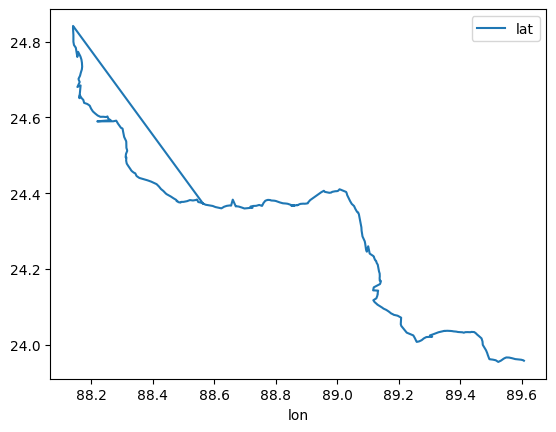

In [220]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'N6'].plot(x='lon', y='lat')

In [221]:
df_rds_dblseqcorrected.iloc[7360:7370]

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
7360,N6,LRP227,24.808639,88.142833,NaN,0.008917,0.005139,NaN,NaN,NaN
7361,N6,LRP227a,24.813778,88.142833,NaN,0.005139,0.003805,NaN,NaN,NaN
7362,N6,LRP228,24.817583,88.142833,NaN,0.003805,0.009573,NaN,NaN,NaN
7363,N6,LRP229,24.827138,88.142250,NaN,0.009573,0.008446,NaN,NaN,NaN
7364,N6,LRP230,24.835555,88.141555,NaN,0.008446,0.005753,NaN,NaN,NaN
7365,N6,LRP230a,24.841305,88.141750,NaN,0.005753,0.000371,NaN,NaN,NaN
7366,N6,LRP230b,24.841666,88.141666,NaN,0.000371,0.630576,NaN,NaN,NaN
7367,N6,LRPE,24.373138,88.563694,End point,0.630576,0.445908,NaN,NaN,To correct manually
7368,N602,LRPS,24.410583,89.008028,Start point,0.445908,0.000507,NaN,NaN,NaN
7369,N602,LRPSa,24.410667,89.007528,NaN,0.000507,0.991084,NaN,NaN,NaN


This outlier is a mystery case. The lat aswell as the lon are very different than the previous one. This LRP was strange from the beginning on, and has nothing to do with our algorithm alterations. As the goal is to clean the dataset in order to use a chainage, the most logical thing to do is to give this LRP the coordinates of the point exactly before. This will give a duplicate, but the chainage will not be disrupted as much as it is now.

In [222]:
df_rds_dblseqcorrected.at[7367,'lat_correction']= df_rds_dblseqcorrected.at[7367,'lat'] - 24.841666
df_rds_dblseqcorrected.at[7367,'lon_correction']= df_rds_dblseqcorrected.at[7367,'lon'] - 88.141666

df_rds_dblseqcorrected.at[7367,'lat']=24.841666
df_rds_dblseqcorrected.at[7367,'lon']=88.141666

<Axes: xlabel='lon'>

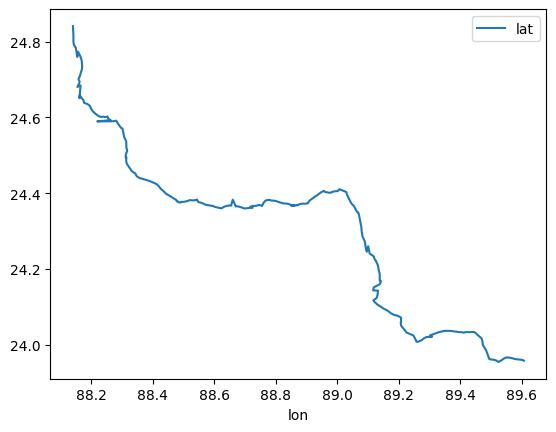

In [223]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'N6'].plot(x='lon', y='lat')

### Sixth outlier

In [224]:
df_rds_dblseqcorrected.iloc[12110:12120]

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
12110,R203,LRP072a,23.874027,91.105833,NaN,0.018986,0.016905,NaN,NaN,NaN
12111,R203,LRP073,23.890916,91.106556,NaN,0.016905,0.002161,NaN,NaN,NaN
12112,R203,LRP073a,23.892639,91.107861,NaN,0.002161,0.000958,NaN,NaN,NaN
12113,R203,LRP074,23.893472,91.108333,NaN,0.000958,0.001834,NaN,NaN,NaN
12114,R203,LRP074a,23.894527,91.109833,NaN,0.001834,0.007600,NaN,NaN,NaN
12115,R203,LRP075,23.898555,91.116278,NaN,0.007600,0.994397,NaN,NaN,NaN
12116,R203,LRP075a,23.902306,90.121888,NaN,0.994397,0.000056,NaN,NaN,To correct manually
12117,R203,LRP075b,23.902306,90.121944,NaN,0.000056,0.002430,NaN,NaN,NaN
12118,R203,LRP076,23.903222,90.124194,NaN,0.002430,0.002390,NaN,NaN,NaN
12119,R203,LRPE,23.903306,90.126583,End point,0.002390,0.561371,NaN,NaN,NaN


<Axes: xlabel='lon'>

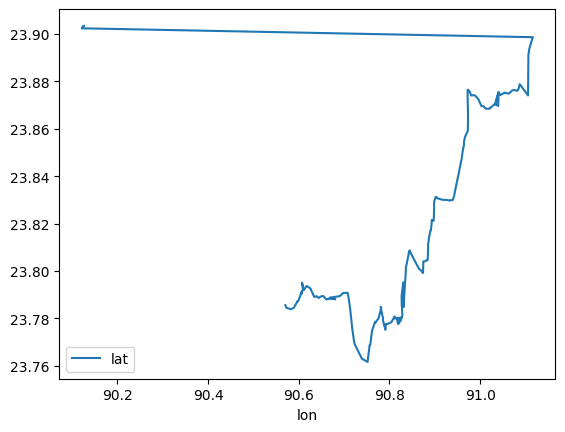

In [225]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'R203'].plot(x='lon', y='lat')

This LRP is the beginning of four sequential outliers. It has not been flagged because the last point is an LRPE. We will manually correct all their lon by one point.

In [226]:
df_rds_dblseqcorrected.at[12116,'lon_correction'] = 1
df_rds_dblseqcorrected.at[12117,'lon_correction'] = 1
df_rds_dblseqcorrected.at[12118,'lon_correction'] = 1
df_rds_dblseqcorrected.at[12119,'lon_correction'] = 1

df_rds_dblseqcorrected.at[12116,'lon']+=1
df_rds_dblseqcorrected.at[12117,'lon']+=1
df_rds_dblseqcorrected.at[12118,'lon']+=1
df_rds_dblseqcorrected.at[12119,'lon']+=1

### Seventh outlier

In [227]:
df_rds_dblseqcorrected.iloc[12115:12120]

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
12115,R203,LRP075,23.898555,91.116278,NaN,0.007600,0.994397,NaN,NaN,NaN
12116,R203,LRP075a,23.902306,91.121888,NaN,0.994397,0.000056,NaN,1.0,To correct manually
12117,R203,LRP075b,23.902306,91.121944,NaN,0.000056,0.002430,NaN,1.0,NaN
12118,R203,LRP076,23.903222,91.124194,NaN,0.002430,0.002390,NaN,1.0,NaN
12119,R203,LRPE,23.903306,91.126583,End point,0.002390,0.561371,NaN,1.0,NaN


<Axes: xlabel='lon'>

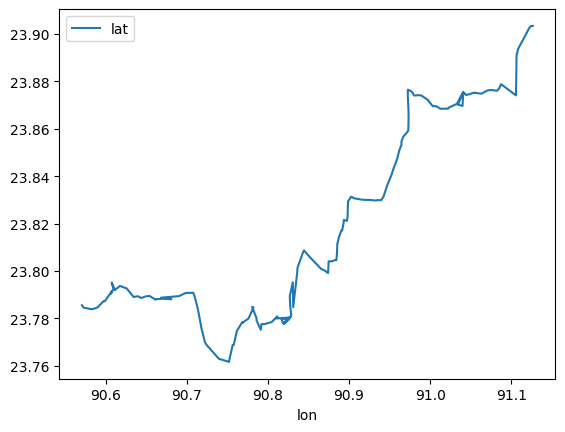

In [228]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'R203'].plot(x='lon', y='lat')

### Eight outlier

In [229]:
df_rds_dblseqcorrected.iloc[14650:14660]

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected
14650,R370,LRP086a,24.955833,91.083944,NaN,0.005728,0.000295,NaN,NaN,NaN
14651,R370,LRP086b,24.956056,91.084139,NaN,0.000295,0.002850,NaN,NaN,NaN
14652,R370,LRP086c,24.958000,91.086222,NaN,0.002850,0.158989,NaN,NaN,NaN
14653,R370,LRP112a,25.003889,91.238444,NaN,0.158989,0.002398,NaN,NaN,To correct manually
14654,R370,LRP113,25.002250,91.240194,NaN,0.002398,0.007502,NaN,NaN,NaN
14655,R370,LRP113a,25.009750,91.240361,NaN,0.007502,0.003628,NaN,NaN,NaN
14656,R370,LRP113b,25.013028,91.241916,NaN,0.003628,0.000423,NaN,NaN,NaN
14657,R370,LRP113c,25.013194,91.242305,NaN,0.000423,0.001818,NaN,NaN,NaN
14658,R370,LRP114,25.014917,91.242889,NaN,0.001818,0.009117,NaN,NaN,NaN
14659,R370,LRP115,25.021805,91.248861,NaN,0.009117,0.003562,NaN,NaN,NaN


<Axes: xlabel='lon'>

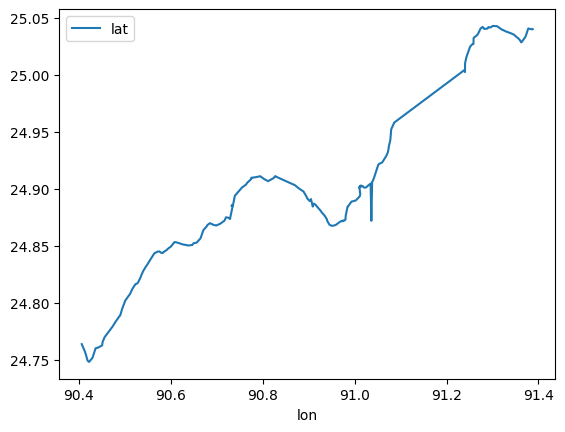

In [230]:
df_rds_dblseqcorrected[df_rds_dblseqcorrected['road'] == 'R370'].plot(x='lon', y='lat')

According to google maps the river Surma is passing at that point, and also there are 26 LRPs missing : LRP86c is followed by LRP112a. The missing 0.15 points in lat (less than 20 km) can be explained by the 26 missing LRPs (coverring a low distance) and the fact that there is a wide river flowing through that part (long distance with few LRPs). We wil not correct the LRP.

# Add chainage based on calculated len_prev

In [231]:
# Correct values for length to LRPs after manual correction
df_shift_next_new = df_rds_dblseqcorrected.shift(-1)
df_shift_prev_new = df_rds_dblseqcorrected.shift(1)


df_rds_dblseqcorrected['len_prev'] = np.sqrt((df_shift_prev_new.lat - df_rds_dblseqcorrected.lat)**2 + (df_shift_prev_new.lon - df_rds_dblseqcorrected.lon)**2)
df_rds_dblseqcorrected['len_next'] = np.sqrt((df_shift_next_new.lat - df_rds_dblseqcorrected.lat)**2 + (df_shift_next_new.lon - df_rds_dblseqcorrected.lon)**2)

for index, row in df_rds_dblseqcorrected.iterrows():
    
        if row['type'] == 'Start point':
            df_rds_dblseqcorrected.at[index, 'len_prev'] = 0
            
        elif row['type'] == 'End point':
            df_rds_dblseqcorrected.at[index, 'len_next'] = 0

In [232]:
def calculate_chainage():
        df_chain = df_rds_dblseqcorrected.copy()
        df_chain['calculated_chainage'] = 0
 
        for index, row in df_chain.iterrows(): # Iterate each LRP
                road = row['road']
                if index != 0 and road == df_chain.at[index-1, 'road']:
                        df_chain.at[index, 'calculated_chainage'] = df_chain.at[index, 'len_prev'] + df_chain.at[index-1, 'calculated_chainage']
 
        return df_chain

In [233]:
df_final_roads = calculate_chainage()
df_final_roads

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected,calculated_chainage
0,N1,LRPS,23.706028,90.443333,Start point,0.000000,0.007737,NaN,NaN,NaN,0.000000
1,N1,LRPSa,23.702917,90.450417,NaN,0.007737,0.000150,NaN,NaN,NaN,0.007737
2,N1,LRPSb,23.702778,90.450472,NaN,0.000150,0.001630,NaN,NaN,NaN,0.007886
3,N1,LRP001,23.702139,90.451972,NaN,0.001630,0.009603,NaN,NaN,NaN,0.009517
4,N1,LRP002,23.697889,90.460583,NaN,0.009603,0.001205,NaN,NaN,NaN,0.019120
...,...,...,...,...,...,...,...,...,...,...,...
52205,Z8943,LRP007,22.429499,90.785722,NaN,0.002514,0.009409,NaN,NaN,NaN,0.065246
52206,Z8943,LRP008,22.430110,90.776333,NaN,0.009409,0.001451,NaN,NaN,NaN,0.074655
52207,Z8943,LRP008a,22.430249,90.774888,NaN,0.001451,0.000028,NaN,NaN,NaN,0.076106
52208,Z8943,LRP008b,22.430249,90.774860,NaN,0.000028,0.005945,NaN,NaN,NaN,0.076134


In [234]:
# Make a csv
csv_file_path = 'WBSIM_Lab1_2024/final_cleaned_roads.csv'
df_final_roads.to_csv(csv_file_path, index=False)

In [267]:
df_final_roads.loc[df_final_roads['road'] == 'N713']

,road,LRP,lat,lon,type,len_prev,len_next,lat_correction,lon_correction,corrected,calculated_chainage


# Transpose to tsv

In [238]:
df_tsv_original = pd.DataFrame(data=df_final_roads.loc[:, ['road', 'LRP', 'lat', 'lon']], columns=['road', 'LRP', 'lat', 'lon'])
df_tsv = pd.DataFrame()

In [252]:
global i, row_number
i = 0
row_number = -1

for index, row in df_tsv_original.iterrows(): # Iterate each LRP
    road = row['road']
    if index != 0 and road == df_tsv_original.at[index-1, 'road']:
        df_tsv.at[row_number, i] = df_tsv_original.at[index, 'LRP']
        i += 1
        df_tsv.at[row_number, i] = df_tsv_original.at[index, 'lat']
        i += 1
        df_tsv.at[row_number, i] = df_tsv_original.at[index, 'lon']
        i += 1
    else:
        row_number += 1
        df_tsv.at[row_number, 'road'] = road 
        i = 0
        df_tsv.at[row_number, i] = df_tsv_original.at[index, 'LRP']
        i += 1
        df_tsv.at[row_number, i] = df_tsv_original.at[index, 'lat']
        i += 1
        df_tsv.at[row_number, i] = df_tsv_original.at[index, 'lon']
        i += 1

In [256]:
df_tsv = df_tsv.drop(df_tsv.index[877])

,road,0,1,2,3,4,5,6,7,8,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,...,92.29825,LRP466c,20.864667,92.298194,LRP467,20.862972,92.298083,LRPE,20.862917,92.298083
1,N101,LRPS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,...,92.29825,LRP466c,20.864667,92.298194,LRP467,20.862972,92.298083,LRPE,20.862917,92.298083
2,N102,LRPS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N103,LRPS,23.957028,91.115528,LRP001,23.961917,91.113611,LRP001a,23.967666,91.111889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N104,LRPS,23.009667,91.399416,LRPSa,23.009278,91.395250,LRP001,23.009306,91.389805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,Z8910,LRPS,22.674722,90.408889,LRPSa,22.675916,90.412556,LRP001,22.675583,90.417166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,Z8913,LRPS,22.396083,90.688666,LRPSa,22.393027,90.688944,LRPSb,22.392666,90.689083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,Z8915,LRPS,22.589389,90.619472,LRP001,22.589694,90.623360,LRP001a,22.590027,90.631360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,Z8916,LRPS,22.625499,90.661722,LRPSa,22.623888,90.664167,LRP001,22.620305,90.668999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
tsv_file_path = 'WBSIM_Lab1_2024/roads_cleaned.tsv'
df_tsv.to_csv(tsv_file_path, sep='\t', index=False)